# Notebook de exploration des données jobs_events

# A) Imports

## Librairies

In [254]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Data

In [255]:
# source path to raw metrics dataset
filename = 'merge_raw_job_events_dataset.csv'
path = '../data/jobs'
job_events = os.path.join(path, filename)
# target path to save merge raw metrics dataset
save_csv = '../data/jobs/merge_clean_job_events_dataset.csv'

# B) Dataframe

In [256]:
# création d'un dataframe à partir du csv de données
df = pd.read_csv(job_events, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16297 entries, 0 to 16296
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   jobId                                                 16297 non-null  int64  
 1   timestamp_start                                       16295 non-null  object 
 2   totalCopies_start                                     16295 non-null  float64
 3   LED_iper                                              16295 non-null  float64
 4   bars_iper                                             16295 non-null  object 
 5   drops_iper                                            16295 non-null  float64
 6   dithering_iper                                        16295 non-null  object 
 7   deadPixelsOffset_iper                                 16295 non-null  float64
 8   level_user                                            16

In [257]:
# réindexation
df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
df.head(5)

,jobId,timestamp_start,totalCopies_start,LED_iper,bars_iper,drops_iper,dithering_iper,deadPixelsOffset_iper,level_user,operator_user,...,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,totalCopies_end,consumption_operatorSideTanks_varnishConsumption,path,image
0,1624008166,2021-06-18T09:22:46.8661892Z,3.0,10.0,"[1, 2]",3.0,False,0.0,Distributor,Distributor,...,1500.0,16.0,16.0,1.0,NaN,NaN,NaN,NaN,D:/IMAGES/Standard/3040459-52x74-350 CM-18-06-...,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...
1,1624010893,2021-06-18T10:08:13.7169739Z,100.0,30.0,"[1, 2]",4.0,False,0.0,Operator,Micka,...,1500.0,16.0,10.0,1.0,ERROR,2021-06-18T10:10:22.2570778Z,3.0,1.440239,D:/IMAGES/Standard/3040459-52x74-350 CM-18-06-...,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...
2,1624011111,2021-06-18T10:11:52.1659526Z,100.0,30.0,"[1, 2]",4.0,False,0.0,Operator,Micka,...,1500.0,16.0,10.0,1.0,CANCELED,2021-06-18T10:18:20.2945923Z,70.0,33.607494,D:/IMAGES/Standard/3040459-52x74-350 CM-18-06-...,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...
3,1624012222,2021-06-18T10:30:23.0496491Z,50.0,10.0,[2],1.0,False,0.0,Operator,Micka,...,1500.0,16.0,10.0,1.0,NaN,NaN,NaN,NaN,D:/IMAGES/Standard/3035811-5coul#1/0000001 V01...,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...
4,1624019711,2021-06-18T12:35:11.8641173Z,1.0,10.0,[2],1.0,False,0.0,Operator,Viktor,...,1500.0,16.0,16.0,1.0,NaN,NaN,NaN,NaN,D:/IMAGES/Standard/3037332-vernis/3037332-vern...,/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAgGBgcGBQgHBw...


## 1) Nettoyage

### a) Lignes

In [258]:
# on vérifie si il existe des lignes sans timestamp de départ
no_start_row = list(df[df['timestamp_start'].isna()].index)
no_start_row

[16295, 16296]

In [259]:
# on supprime les lignes sans timestamp de départ
df.drop(no_start_row, axis=0, inplace=True)

### b) Colonnes

In [260]:
df.columns

Index(['jobId', 'timestamp_start', 'totalCopies_start', 'LED_iper',
       'bars_iper', 'drops_iper', 'dithering_iper', 'deadPixelsOffset_iper',
       'level_user', 'operator_user', 'speed_ifoil', 'enabled_ifoil',
       'optifoil_ifoil', 'stampAreas_ifoil', 'heater1Enabled_ifoil',
       'speedTensionIn_ifoil', 'heater1Temperature_ifoil',
       'x_imageLayout_layout', 'y_imageLayout_layout',
       'name_paperFormat_layout', 'width_paperFormat_layout',
       'height_paperFormat_layout', 'speed_layout', 'power_irDryers',
       'power_uvDryers', 'topMargin_registration_remoteScannerRegistration',
       'leftMargin_registration_remoteScannerRegistration',
       'redScore_gridMode_remoteScannerRegistration',
       'redScore_cropmarksMode_remoteScannerRegistration',
       'redScore_fullScannerMode_remoteScannerRegistration',
       'blueScore_fullScannerMode_remoteScannerRegistration',
       'greenScore_fullScannerMode_remoteScannerRegistration',
       'mode_remoteScannerRegistra

In [261]:
df.consumption_operatorSideTanks_varnishConsumption.max()

1010.40445205

#### Suppression

In [262]:
# suppression des colonnes non pertinentes
col_to_drop = [
    'jobId',
    'level_user',
    'operator_user', 
    'path', 
    'image']
df.drop(col_to_drop, axis=1, inplace=True)

#### Données maquantes

In [263]:
# on liste les colonnes qui contiennent des valeurs nulles
col_with_nan = []
for col in df.columns:
    if df[col].isnull().any():
        col_with_nan.append(col)

for col in col_with_nan :
    if df[col].nunique() <= 10 :
        print(col, ':', df[col].unique())
    else :
        print(col, ':', df[col].nunique())

name_paperFormat_layout : [nan 'B2']
jobState : [nan 'ERROR' 'CANCELED' 'SUCCESS']
timestamp_end : 16201
totalCopies_end : 681
consumption_operatorSideTanks_varnishConsumption : 14242


In [264]:
df['name_paperFormat_layout'] = df['name_paperFormat_layout'].fillna('UNDEFINED')

In [265]:
df['jobState'] = df['jobState'].fillna('UNDEFINED')

In [266]:
df['timestamp_end'] = df['timestamp_end'].apply(lambda x: False if pd.isna(x) else True)

In [267]:
df['totalCopies_end'] = df['totalCopies_end'].fillna(0)

In [268]:
df['consumption_operatorSideTanks_varnishConsumption'] = df['consumption_operatorSideTanks_varnishConsumption'].fillna(float(0))

#### Conversion de type

In [269]:
df['totalCopies_start'] = df['totalCopies_start'].astype('int64')
df['totalCopies_end'] = df['totalCopies_end'].astype('int64')
df['LED_iper'] = df['LED_iper'].astype('int64')
df['drops_iper'] = df['drops_iper'].astype('int64')
df['deadPixelsOffset_iper'] = df['deadPixelsOffset_iper'].astype('int64')
df['speed_ifoil'] = df['speed_ifoil'].astype('int64')
df['heater1Temperature_ifoil'] = df['heater1Temperature_ifoil'].astype('int64')
df['x_imageLayout_layout'] = df['x_imageLayout_layout'].astype('int64')
df['y_imageLayout_layout'] = df['y_imageLayout_layout'].astype('int64')
df['speed_layout'] = df['speed_layout'].astype('int64')
df['power_irDryers'] = df['power_irDryers'].astype('int64')
df['power_uvDryers'] = df['power_uvDryers'].astype('int64')
df['topMargin_registration_remoteScannerRegistration'] = df['topMargin_registration_remoteScannerRegistration'].astype('int64')
df['leftMargin_registration_remoteScannerRegistration'] = df['leftMargin_registration_remoteScannerRegistration'].astype('int64')
df['redScore_gridMode_remoteScannerRegistration'] = df['redScore_gridMode_remoteScannerRegistration'].astype('int64')
df['redScore_cropmarksMode_remoteScannerRegistration'] = df['redScore_cropmarksMode_remoteScannerRegistration'].astype('int64')
df['redScore_fullScannerMode_remoteScannerRegistration'] = df['redScore_fullScannerMode_remoteScannerRegistration'].astype('int64')
df['blueScore_fullScannerMode_remoteScannerRegistration'] = df['blueScore_fullScannerMode_remoteScannerRegistration'].astype('int64')
df['greenScore_fullScannerMode_remoteScannerRegistration'] = df['greenScore_fullScannerMode_remoteScannerRegistration'].astype('int64')

In [270]:
for col in list(df.select_dtypes(include=['object']).columns):
    print(col, ' : ', df[col].unique()) if df[col].nunique() <= 5  else print(col, ' : ', df[col].nunique())

timestamp_start  :  16295
bars_iper  :  ['[1, 2]' '[2]' '[1]']
dithering_iper  :  [False True]
enabled_ifoil  :  [False True]
optifoil_ifoil  :  [True False]
stampAreas_ifoil  :  24
heater1Enabled_ifoil  :  [False True]
name_paperFormat_layout  :  ['UNDEFINED' 'B2']
jobState  :  ['UNDEFINED' 'ERROR' 'CANCELED' 'SUCCESS']


In [271]:
df['timestamp_start'] = pd.to_datetime(df['timestamp_start'], utc=True)

In [272]:
df['dithering_iper'] = df['dithering_iper'].astype('bool')
df['enabled_ifoil'] = df['enabled_ifoil'].astype('bool')
df['optifoil_ifoil'] = df['optifoil_ifoil'].astype('bool')
df['heater1Enabled_ifoil'] = df['heater1Enabled_ifoil'].astype('bool')

#### Output csv

In [228]:
df.to_csv(path_or_buf=Path(save_csv))

#### Encodage

In [229]:
# on remplace dans le dataframe les valeurs du type 'str' avec un code
jobState = {'UNDEFINED': 0, 'ERROR': 1, 'CANCELED': 2, 'SUCCESS':3}
df.jobState.replace(jobState  , inplace=True)

## 2) Exploration

In [230]:
df.head(3)

,timestamp_start,totalCopies_start,LED_iper,bars_iper,drops_iper,dithering_iper,deadPixelsOffset_iper,speed_ifoil,enabled_ifoil,optifoil_ifoil,...,redScore_gridMode_remoteScannerRegistration,redScore_cropmarksMode_remoteScannerRegistration,redScore_fullScannerMode_remoteScannerRegistration,blueScore_fullScannerMode_remoteScannerRegistration,greenScore_fullScannerMode_remoteScannerRegistration,mode_remoteScannerRegistration,jobState,timestamp_end,totalCopies_end,consumption_operatorSideTanks_varnishConsumption
0,2021-06-18 09:22:46.866189200+00:00,3,10,"[1, 2]",3,False,0,31,False,True,...,1500,1500,1500,16,16,1.0,0,False,0,0.000000
1,2021-06-18 10:08:13.716973900+00:00,100,30,"[1, 2]",4,False,0,26,False,True,...,1500,1500,1500,16,10,1.0,1,True,3,1.440239
2,2021-06-18 10:11:52.165952600+00:00,100,30,"[1, 2]",4,False,0,26,False,True,...,1500,1500,1500,16,10,1.0,2,True,70,33.607494


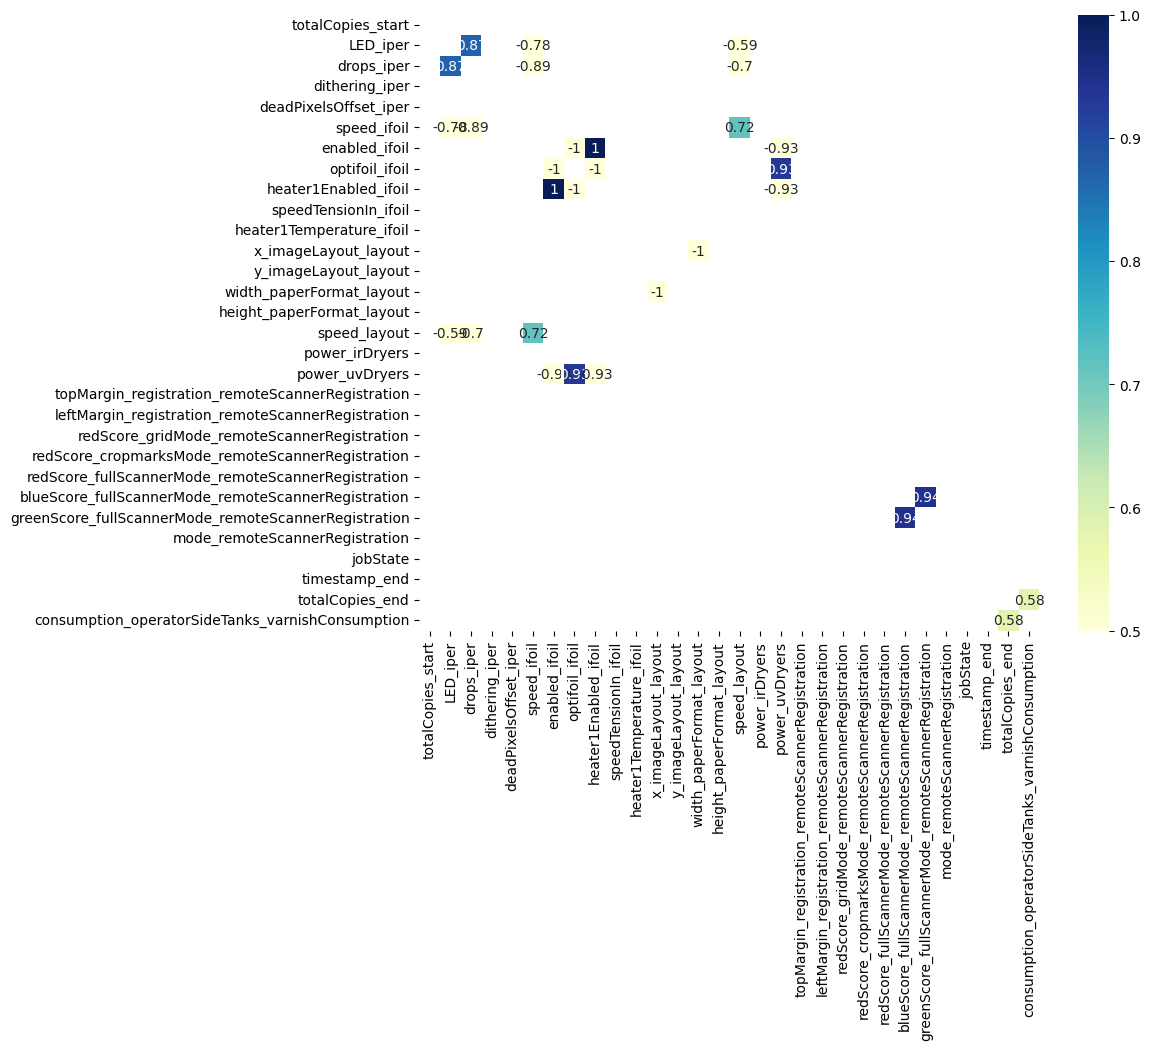

In [231]:
# visualisation avec matrice de correlation
# fig, ax = plt.subplots(figsize=(10, 8))
# corr_matrix = df.corr(numeric_only=True, method='pearson')
# sns.heatmap(corr_matrix, ax=ax)
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr(numeric_only=True, method='pearson')
threshold = 0.5
mask = corr_matrix == 1
corr_matrix_filtered = corr_matrix[abs(corr_matrix) > threshold]
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_filtered, cmap='YlGnBu', annot=True, vmin=threshold, vmax=1.0, ax=ax, mask=mask)
plt.show()



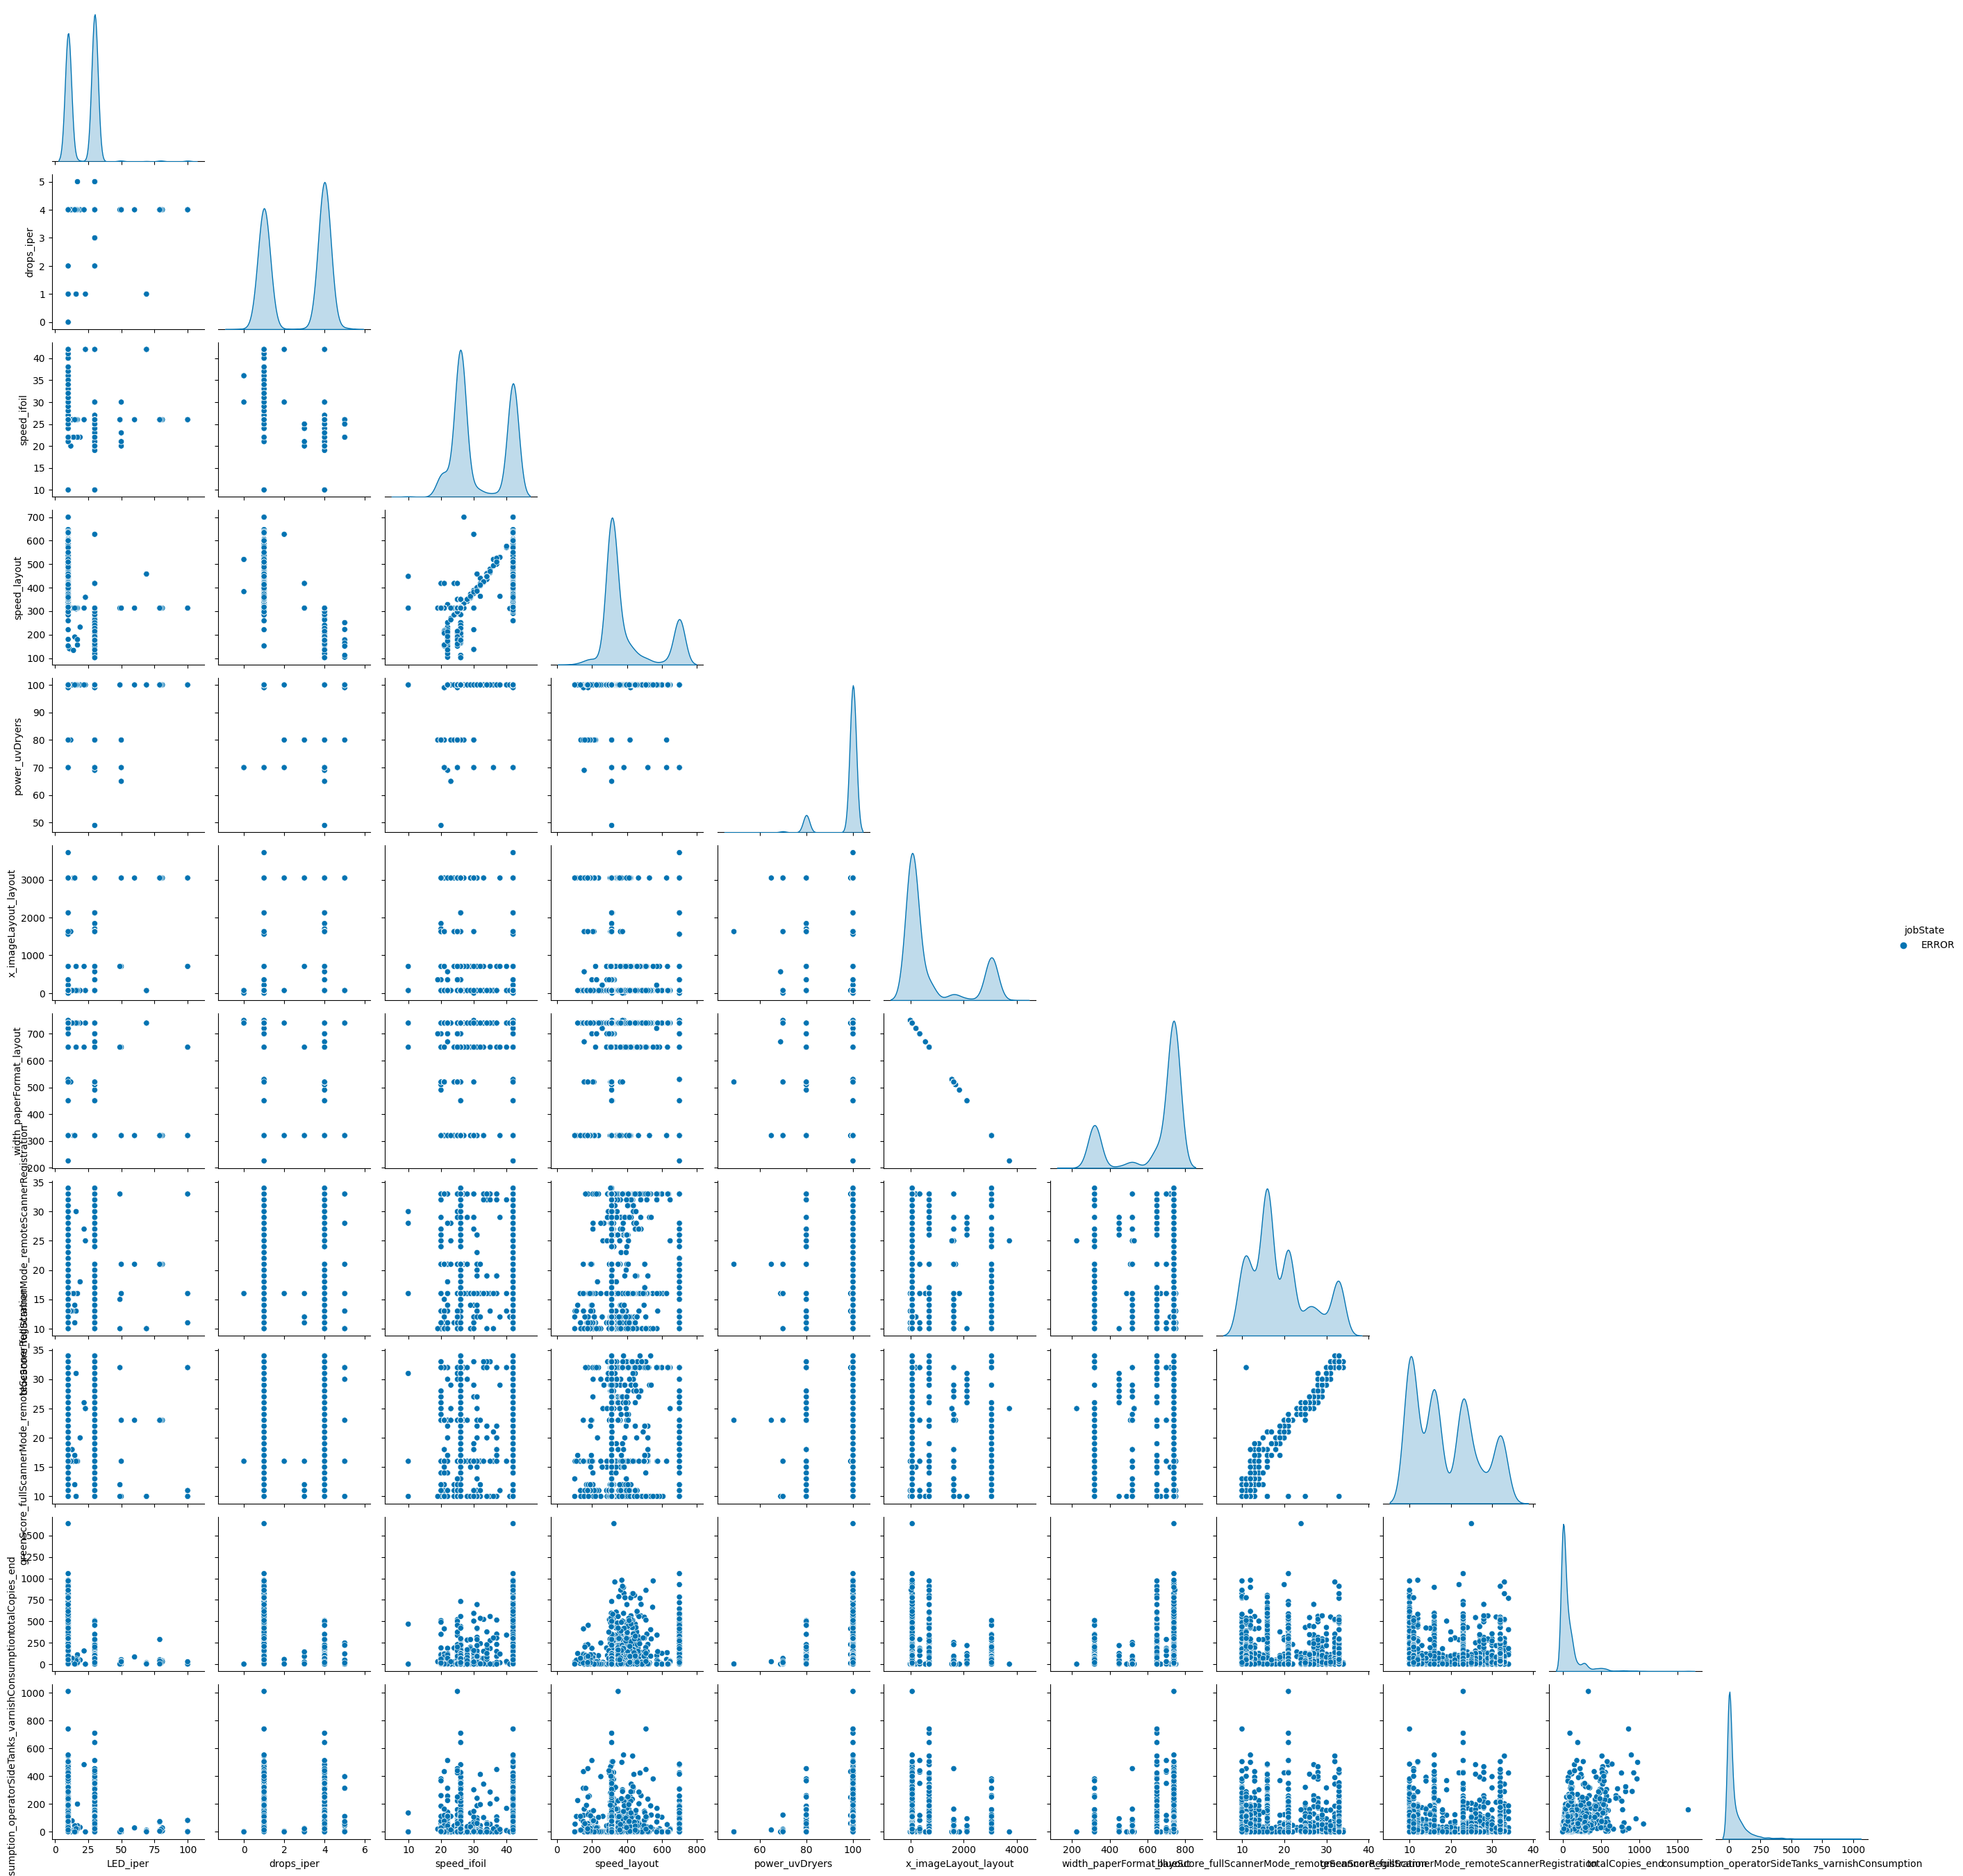

In [275]:

sns.pairplot(df[[
    'jobState',
    'LED_iper',
    'drops_iper',
    'speed_ifoil',
    'speed_layout',
    'power_uvDryers',
    'x_imageLayout_layout',
    'width_paperFormat_layout',
    'blueScore_fullScannerMode_remoteScannerRegistration',
    'greenScore_fullScannerMode_remoteScannerRegistration',
    'totalCopies_end',
    'consumption_operatorSideTanks_varnishConsumption']], 
    hue='jobState', 
    corner=True, 
    palette='colorblind')